<h2>Histogram Calculation</h2>

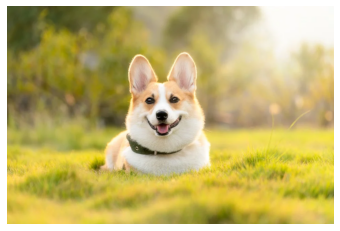

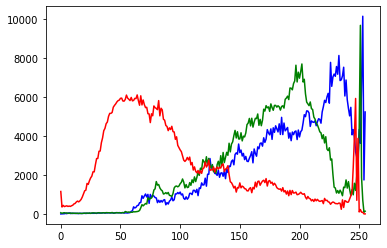

In [2]:
%matplotlib inline
import cv2 as cv 
import matplotlib.pyplot as plt 
import numpy as np 

img = cv.imread('../Images/corgi.webp', cv.IMREAD_COLOR)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis("off")
plt.show()
color = ('b', 'g', 'r')
for i,c in enumerate(color):
    hist = cv.calcHist([img],[i],None,[256],[0,256])
    plt.plot(hist,color=c)
plt.show()

<H2> Histogram Equalization </H2>

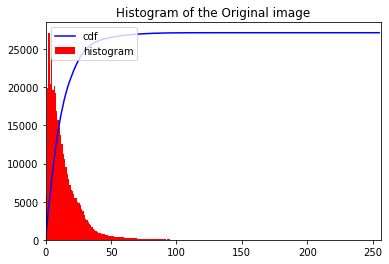

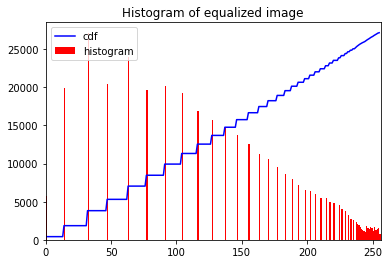

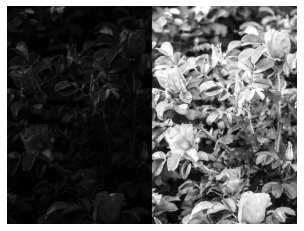

In [1]:
%matplotlib inline
#Histogram Equalization

import numpy as np 
import matplotlib.pyplot as plt 
import cv2 as cv 

img = cv.imread('../Images/rose.jpeg', cv.IMREAD_GRAYSCALE)
#ravel returns a flattened array
#histogram function - numpy.histogram(a, bins=10, range=None, normed=None, weights=None, density=None)
#a- Input data. The histogram is computed over the flattened array.
#range - The lower and upper range of the bins
#hist - values of the histogram
hist,bins = np.histogram(img.ravel(),256,[0,256])

cdf = hist.cumsum()

cdf_normalized=cdf*hist.max()/cdf.max()

plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.plot(cdf_normalized, color = 'b')

plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.title("Histogram of the Original image")
plt.show()

equ = cv.equalizeHist(img)

hist,bins= np.histogram(equ.ravel(),256,[0,256])
cdf=hist.cumsum()
cdf_normalized = cdf*hist.max()/cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(equ.flatten(),256,[0,256],color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.title("Histogram of equalized image")
plt.show()

res = np.hstack((img,equ))
plt.axis('off')
#plt.imshow(img,cmap='gray')
plt.imshow(res,cmap='gray')

<h2>Intensity Transformations</h2>

101
30
70
55
256


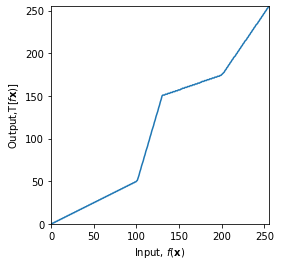

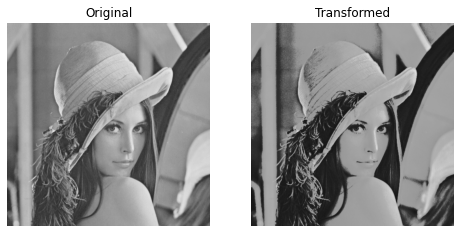

In [12]:
%matplotlib inline 
import cv2 as cv 
import matplotlib.pyplot as plt 
import numpy as np 
img_orig=cv.imread('../Images/lena.png',cv.IMREAD_GRAYSCALE)


c=np.array([(100,50),(130,150),(200,175)])
t1=np.linspace(0,c[0,1],c[0,0]+1-0).astype('uint8')
t2=np.linspace(c[0,1]+1,c[1,1],c[1,0]-c[0,0]).astype('uint8')
t3=np.linspace(c[1,1]+1,c[2,1],c[2,0]-c[1,0]).astype('uint8')
t4=np.linspace(c[2,1]+1,255,255-c[2,0]).astype('uint8')
transform=np.concatenate((t1,t2),axis=0).astype('uint8')
transform=np.concatenate((transform,t3),axis=0).astype('uint8')
transform=np.concatenate((transform,t4),axis=0).astype('uint8')

image_transformed=cv.LUT(img_orig,transform)

fig,ax=plt.subplots()
ax.plot(transform)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel('Output,$\mathrm{T}[f\mathbf{x})]$')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal')
plt.show()



fig,ax=plt.subplots(1,2, figsize=(8,5))
ax[0].imshow(img_orig,cmap='gray',vmin=0,vmax=255)
ax[0].set_title('Original')
ax[0].axis('off')
ax[1].imshow(image_transformed,cmap='gray',vmin=0,vmax=255)
ax[1].set_title('Transformed')
ax[1].axis('off')
plt.show()
#cv.namedWindow("Image",cv.WINDOW_AUTOSIZE)
#cv.imshow("Image",img_orig)
#cv.waitKey(0)
image_transformed=cv.LUT(img_orig,transform)
#cv.imshow("Image",image_transformed)
#cv.waitKey(0)
#cv.destroyAllWindows()

<h2>Gamma Correction</h2>

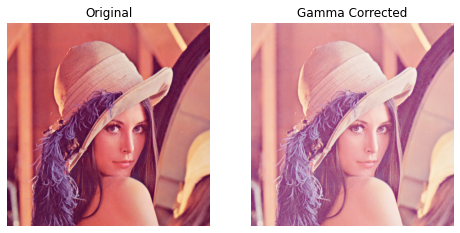

In [2]:
import cv2 as cv 
import matplotlib.pyplot as plt 
import numpy as np 

img_orig = cv.imread('../Images/lena.png',cv.IMREAD_COLOR)
img_orig=cv.cvtColor(img_orig, cv.COLOR_BGR2RGB)
gamma = 0.5
table = np.array([(i/255.0)**(gamma)*255.0 
for i in np.arange(0,256)]).astype('uint8')
img_gamma = cv.LUT(img_orig,table)

fig,ax=plt.subplots(1,2, figsize=(8,8))
ax[0].imshow(img_orig)
ax[0].set_title('Original')
ax[0].axis('off')
ax[1].imshow(img_gamma)
ax[1].set_title('Gamma Corrected')
ax[1].axis('off')
plt.show()

<h2>Gaussian Smoothing</h2>

uint8
255


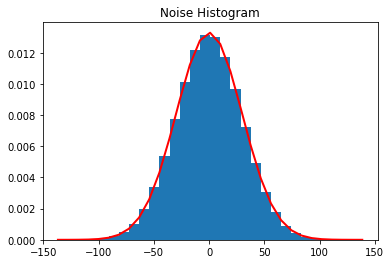

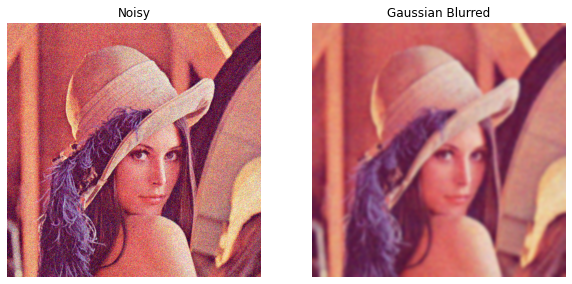

In [48]:
import cv2 as cv 
import matplotlib.pyplot as plt 
import numpy as np 

img = cv.imread('../Images/lena.png', cv.IMREAD_COLOR)
img=cv.cvtColor(img, cv.COLOR_BGR2RGB)
print(img.dtype)
print(img.max())
mu = 0.0
sigma = 30
gauss = np.array(img.shape).astype('uint8')
h,w,c = img.shape
#Draw random samples from a normal (Gaussian) distribution.
#random.normal(loc=0.0, scale=1.0, size=None)
#loc: Mean (“centre”) of the distribution.
#scale: Standard deviation (spread or “width”) of the distribution. Must be non-negative.
#size:Output shape. If the given shape is, e.g., (m, n, k), then m * n * k samples are drawn. If size is None (default), a single value is returned if loc and scale are both scalars. Otherwise, np.broadcast(loc, scale).size samples are drawn.
gauss = np.random.normal(mu,sigma,(h,w,c))
noisy = cv.add(img, gauss, dtype = cv.CV_8UC3)

count,bins, ignored= plt.hist(gauss.ravel(), 30, density =True)
plt.plot(bins, 1/(sigma*np.sqrt(2*np.pi))* np.exp(-(bins-mu)**2/ (2*sigma**2)), linewidth= 2, color='r')
plt.title('Noise Histogram')
plt.show()

#set the filter halfwidth to abouy 3sigma, so if sigma = 1, kernel size is 3x1x2 + 1 = 7
ksize = 19
sigma = 3
blur = cv.GaussianBlur(noisy,(ksize,ksize),sigma)

fig,ax=plt.subplots(1,2, figsize=(10,10))
ax[0].imshow(noisy)
ax[0].set_title('Noisy')
ax[0].axis('off')
ax[1].imshow(blur)
ax[1].set_title('Gaussian Blurred')
ax[1].axis('off')
plt.show()


<h2>Unsharp masking</h2>

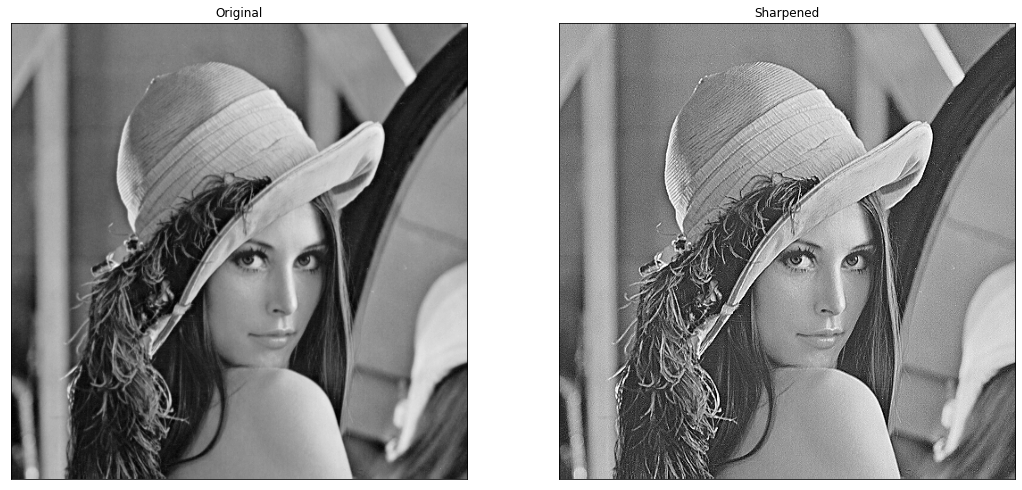

In [61]:
%matplotlib inline
import cv2 as cv 
import numpy as np 
import matplotlib.pyplot as plt 

img = cv.imread('../Images/lena.png', cv.IMREAD_GRAYSCALE)
 
#sobel vertical
kernel = np.array([(0,-1,0),(-1,5,-1),(0,-1,0)], dtype='float') # when you add all the result should be 1
imgc = cv.filter2D(img,-1,kernel)

fig,axes=plt.subplots(1,2, sharex='all', sharey="all", figsize=(18,18))
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original')
axes[0].set_xticks([]),axes[0].set_yticks([])
axes[1].imshow(imgc, cmap='gray')
axes[1].set_title('Sharpened')
axes[1].set_xticks([]),axes[1].set_yticks([])
plt.show()

<h2>Median Filtering</h2>

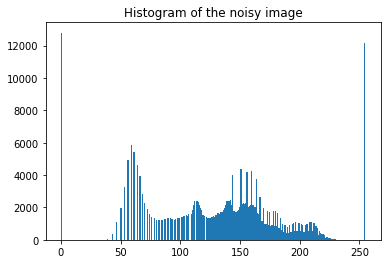

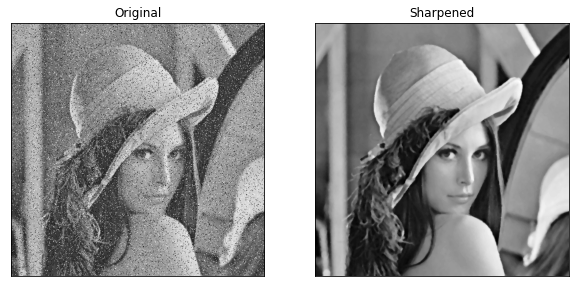

In [63]:
%matplotlib inline
import cv2 as cv
import numpy as np 
import matplotlib.pyplot as plt 
def noisy(noise_typ,image):
   if noise_typ == "s&p":
      row,col = image.shape
      s_vs_p = 0.5
      amount = 0.1
      out = np.copy(image)
      # Salt mode
      num_salt = np.ceil(amount * image.size * s_vs_p)
      coords = [np.random.randint(0, i - 1, int(num_salt))
              for i in image.shape]
      out[coords] = 255

      # Pepper mode
      num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
      coords = [np.random.randint(0, i - 1, int(num_pepper))
              for i in image.shape]
      out[coords] = 0
      return out
img = cv.imread('../Images/lena.png', cv.IMREAD_GRAYSCALE)
imn = noisy('s&p',img.astype('float32'))
#cv.medianBlur(src, ksize)
imf = cv.medianBlur(imn,5)

plt.hist(imn.ravel(), bins = 256)
plt.title("Histogram of the noisy image")

fig,axes=plt.subplots(1,2, sharex='all', sharey="all", figsize=(10,10))
axes[0].imshow(imn, cmap='gray')
axes[0].set_title('Original')
axes[0].set_xticks([]),axes[0].set_yticks([])
axes[1].imshow(imf, cmap='gray')
axes[1].set_title('Sharpened')
axes[1].set_xticks([]),axes[1].set_yticks([])
plt.show()

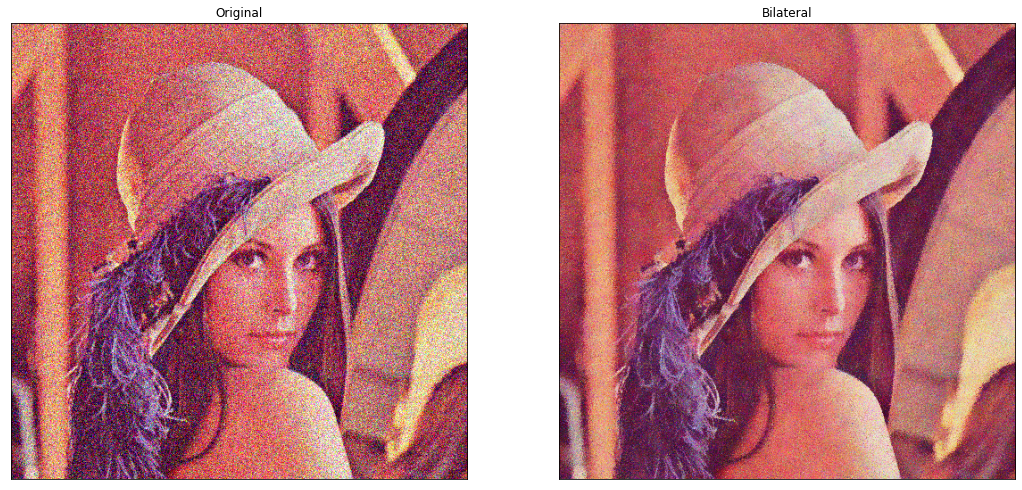

In [5]:
%matplotlib inline
import cv2 as cv 
import numpy as np 
import matplotlib.pyplot as plt 

img = cv.imread('../Images/lena.png', cv.IMREAD_COLOR)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
mu = 0.0
sigma = 50
gauss = np.array(img.shape).astype('uint8')
h,w,c = img.shape
#Draw random samples from a normal (Gaussian) distribution.
#random.normal(loc=0.0, scale=1.0, size=None)
#loc: Mean (“centre”) of the distribution.
#scale: Standard deviation (spread or “width”) of the distribution. Must be non-negative.
#size:Output shape. If the given shape is, e.g., (m, n, k), then m * n * k samples are drawn. If size is None (default), a single value is returned if loc and scale are both scalars. Otherwise, np.broadcast(loc, scale).size samples are drawn.
gauss = np.random.normal(mu,sigma,(h,w,c))
noisy = cv.add(img, gauss, dtype = cv.CV_8UC3)


bilateral = cv.bilateralFilter(noisy,15,75,75)


fig,axes=plt.subplots(1,2, sharex='all', sharey="all", figsize=(18,18))
axes[0].imshow(noisy, cmap='gray')
axes[0].set_title('Original')
axes[0].set_xticks([]),axes[0].set_yticks([])
axes[1].imshow(bilateral, cmap='gray')
axes[1].set_title('Bilateral')
axes[1].set_xticks([]),axes[1].set_yticks([])

plt.show()